-----

## Lets Explore trig derivatives

## $ \frac{d}{dx} (sin(x)) = cos(x) $

## $ \frac{d}{dx} (cos(x)) = - sin(x) $
-----

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


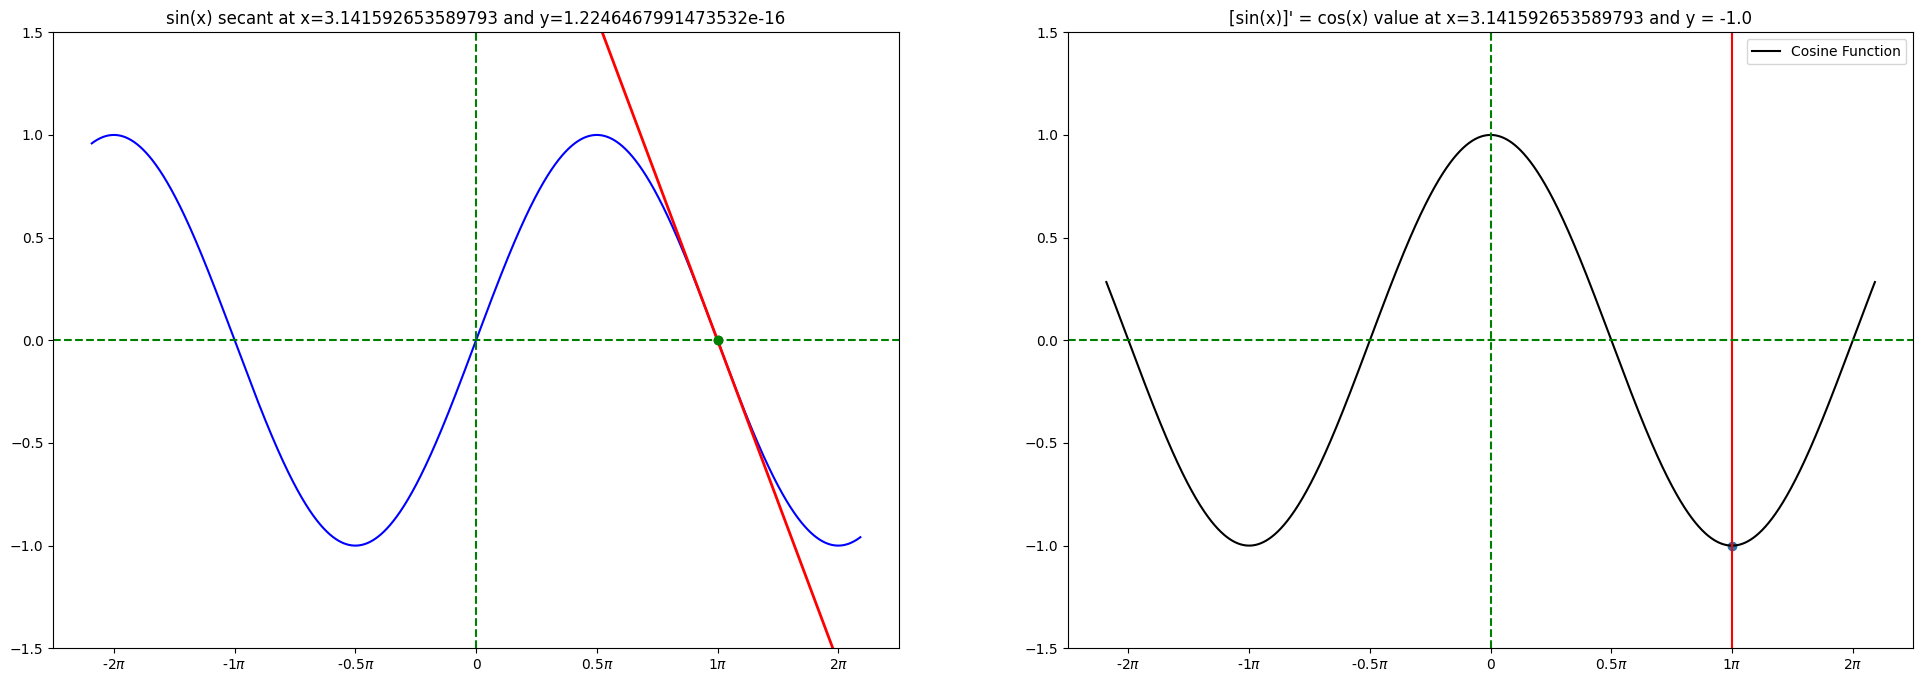

In [2]:
xx = np.linspace(-5, +5, 60000)

# Two points on the sine curve

# some  points where tangent is plain  -np.pi , (-np.pi)/2 ,(-3*np.pi)/2 ,0 , np.pi/2 , (3*np.pi)/2

x1 = np.pi
h = 1e-8  # Small value to approximate the secant line
x2 = x1 + h

y1 = np.sin(x1)
y2 = np.sin(x2)

# Slope of the secant line
m = (y2 - y1) / (x2 - x1)

# Equation of the secant line
secant_line = y1 + m * (xx - x1)
fig, ax = plt.subplots(1, 2, figsize=(24, 8))

# Plot the sine function and the secant line
ax[0].plot(xx, np.sin(xx), label='Sine Function', color='blue')
ax[0].plot(xx, secant_line, label='Secant Line', color='red',linewidth=2)
ax[0].scatter([x1, x2], [y1, y2], color='green', zorder=5)  
ax[0].set_title(f'sin(x) secant at x={x1} and y={y1}')
ax[0].set_ylim(-1.5, +1.5)
ax[0].axhline(0,color="g",linestyle="--")
ax[0].axvline(0, color="g",linestyle="--")
# Format the x-axis in radians
ax[0].xaxis.set_major_locator(ticker.MultipleLocator(base=np.pi / 2))
ax[0].xaxis.set_major_formatter(ticker.FuncFormatter(lambda val, pos: r'{:.0g}$\pi$'.format(val/np.pi) if val != 0 else '0'))
# Plot the cosine function
ax[1].plot(xx, np.cos(xx), label='Cosine Function', color='black')
ax[1].set_title(f"[sin(x)]' = cos(x) value at x={x1} and y = {np.cos(x1)}")
ax[1].set_ylim(-1.5, +1.5)
ax[1].axvline(x1, color="red", linestyle="-")# Vertical line at x1
ax[1].scatter(x1,np.cos(x1))
# plot the origin
ax[1].axhline(0,color="g",linestyle="--")
ax[1].axvline(0, color="g",linestyle="--")
# change format of x axis to radians
ax[1].xaxis.set_major_locator(ticker.MultipleLocator(base=np.pi / 2))
ax[1].xaxis.set_major_formatter(ticker.FuncFormatter(lambda val, pos: r'{:.0g}$\pi$'.format(val/np.pi) if val != 0 else '0'))
plt.legend()
plt.show()

------

# the derivative plot just shows the stepness of the tanget to the function an a given x

# the more steep the tangent is to the curve  the higher the derivative

---


# derivatives of sin and cosine are also called as circular derivatives

# $\frac{d}{dx} cos(x) = -sin(x) $ 
# $\frac{d}{dx} {-sin(x)} = {-cos(x)} $

# $\frac{d}{dx} {-cos(x)} = sin(x) $

# $\frac{d}{dx} sin(x) = cos(x) $

----

## Calculating emperical derivative in numpy



----

In [3]:
h = 0.01
xx = np.arange(-1.5*np.pi,+1.5*np.pi,h) # x -> x+h creating spaced number with diffrence as h between consecutive points


d_y = np.diff(np.cos(xx)) # calculate f(x+h) - f(x) np.diff() for an array it caculates array[i+1] - array[i] and return a new array of all diffrences between consecutive points

d_x = np.diff(xx)   # calculates [(x+h) - x] = h

dydx = d_y / h # f(x+h) - f(x) / h


In [4]:
np.allclose(d_x,h)
## all values in d_x corresponds to h

True

In [5]:
len(xx)

943

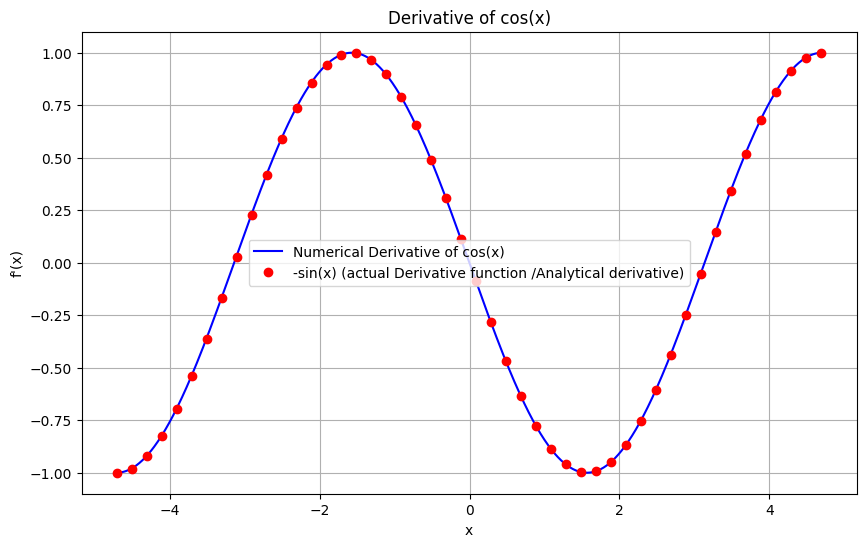

In [6]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(xx[:-1], dydx, color="blue" ,label="Numerical Derivative of cos(x)" )  
plt.plot(xx[::20], -np.sin(xx[::20]), "ro" ,label="-sin(x) (actual Derivative function /Analytical derivative)")  # Analytical derivative for comparison

plt.title("Derivative of cos(x)")
plt.xlabel("x")
plt.ylabel("f'(x)")
plt.legend()
plt.grid(True)
plt.show()

----

# Calculating cyclic trig derivatives in sympy


## create a symbolic $ cos(x) $ and derivate it until you reach back to $ cos(x) $

---

In [7]:
import sympy as sym

from sympy.abc import x

In [8]:
cosx = sym.cos(x)

cosx

cos(x)

In [9]:
cyclic_trig_func = cosx
i = 0
while(True):
    dy_dx = sym.diff(cyclic_trig_func)
    print("f(x) = ",cyclic_trig_func," ","f'(x) =",dy_dx)
    cyclic_trig_func = dy_dx
    i+=1
    if(i!=0 and (cyclic_trig_func == sym.cos(x))):
        break
 


f(x) =  cos(x)   f'(x) = -sin(x)
f(x) =  -sin(x)   f'(x) = -cos(x)
f(x) =  -cos(x)   f'(x) = sin(x)
f(x) =  sin(x)   f'(x) = cos(x)
